#三章 ニューラルネットワーク まとめ

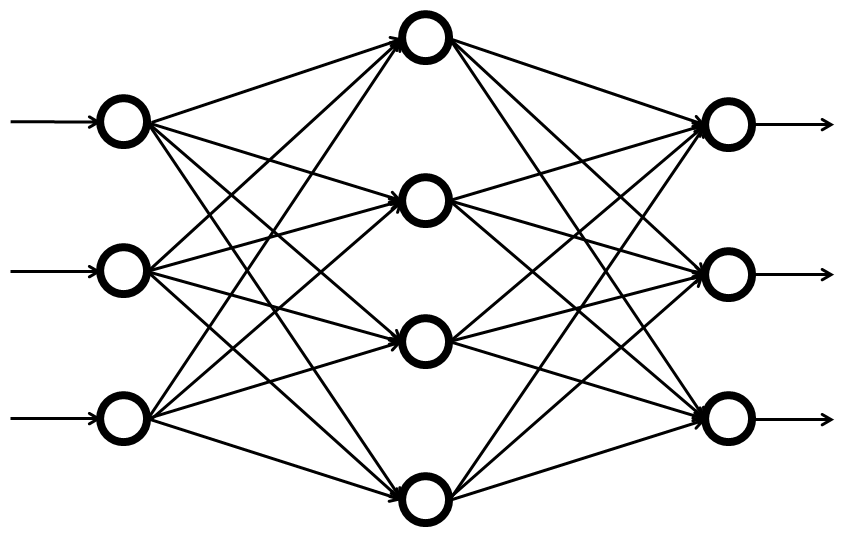

ニューラルネットワークとは上記の図のように左から **入力層**、**中間層**、**出力層**と分けられたニューロン(処理)の集合である。(中間層は**隠れ層**と呼ぶこともある.)

##活性化関数
入力信号の総和を出力信号に変換する関数を**活性化関数**という。
閾値を境に出力が切り替わる活性化関数は**ステップ関数**や**階段関数**と呼ばれる(前章にて紹介されているパーセプトロンではステップ関数を採用している)。
ニューラルネットワークにおいては、**シグモイド関数**や**ReLU関数**などが用いられている。

###シグモイド関数


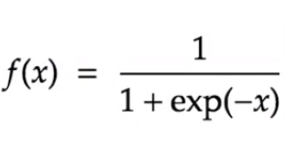

exp(-x)はe^xを表す。eは**ネイピア数**の2.7182...を表す。

###ReLU関数

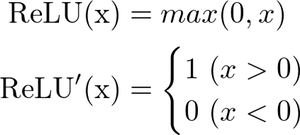

入力が0以下なら0を、0より大きければその入力をそのまま出力するというもの。
最近はシグモイドに代わって用いられている。
とてもシンプル


####上記の活性化関数の比較
ステップ関数 シグモイド関数 ReLU関数をすべて実行したものを重ねると下記のような差がある。(赤がステップ関数、青がシグモイド関数、緑がReLU関数)

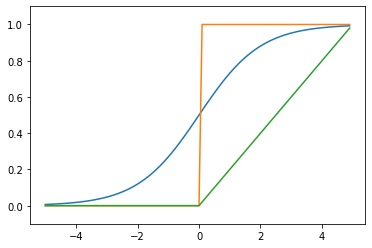

＊これらの関数は、いずれも非線形関数である。ニューラルネットワークにおいては非線形関数を用いる必要がある。線形関数を活性化関数にしてしまうと、いくら隠れ層を深くしてもそれと同じ結果を生む隠れ層のないネットワークが存在してしまい、層を重ねることの意味がなくなってしまう。

##多次元配列の計算
NumPyの多次元配列を使った計算をマスターすれば、ニューラルネットワークの実装を快適に進めることができる。

#####多次元配列
簡単に言うと『数字の集合』である。(先週やった行列のこと)



縦を列、横を行という。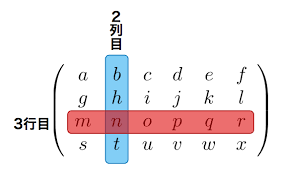

出力の要素数が増えることで膨大になる計算を楽にするためにこの行列は活用できる。

###注意点
行列を用いるときは、要素数を合わせる必要がある。

例 ２＊３の行列と２＊５の行列......これはできない

　 ３＊２の行列と２＊４の行列 ,,,,,,これはいける

##出力層について
　ニューラルネットワークは、分類問題と回帰問題の両方に用いることができる。出力層の活性化関数は、どちらの問題に用いるかによって変更しなければならない。

回帰問題では**恒等関数**を、分類問題では**ソフトマックス関数**を用いる。

##恒等関数
入力をそのまま出力するというもの。下記のようにあらわす。(σは**シグマ**と読む)

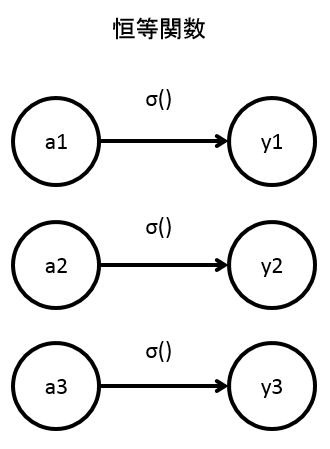

##ソフトマックス関数
下記のような式で表す。

eはネイピア数である。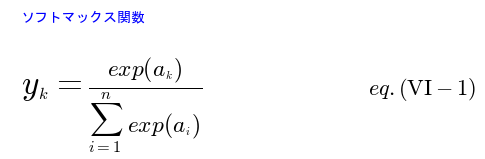

####ちなみに図で表すとこうなる。
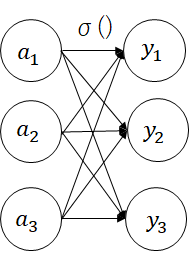

ソフトマックスの出力はすべての入力信号から矢印による結びつきがある。出力の各ニューロンがすべての入力から影響を受けるからである。

##注意
ソフトマックス関数は指数関数の計算をするので値が大きくなりすぎてしまう。その対策をしなければうまく結果が出ず、無限を表すinf が帰ってきてしまう恐れがある。

下記の式はその対策の一例である。

最初の変形でCという任意の定数を分母子にかけ、それを指数関数(exp)に移動させてlogCとし、それをC'という別の記号に置き換えている

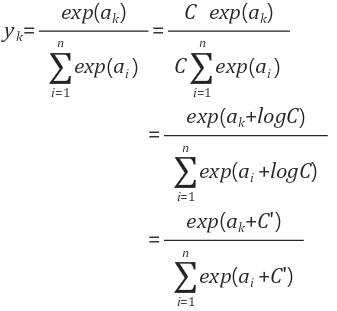

このことからソフトマックスの指数関数のけいさんを行う際には何らかの定数を足し算or引き算しても結果は変わらないのである。

ソフトマックス関数がとる値は、0から1.0の間の実数になる。また、ソフトマックス関数の出力の総和は1となる。これらの性質から、ソフトマックス関数の出力は確率として解釈できる。

##出力層のニューロンの数
出力層のニューロンの数は、解くべき問題に応じて適宜決める必要がある。一般にクラス分類では出力層のニューロン数は分類したいクラスの数に設定する。

##手書き数字認識について
本章の末尾には実践的な問題として手書き数字画像の分類がある。すでに学習が済んだパラメータを使用し、ニューラルネットワークの**推論処理**（順方向伝播ともいう）のみを実装する。

##MNISTデータセット
ここでは機械学習の分野で最も有名なデータセットの一つであるMNISTというものを用いる。今回はデータセットのダウンロード、画像データのNumPy配列への変換に、オライリー・ジャパン発行の「ゼロから作るDeepLearning - Pythonで学ぶディープラーニングの理論と実装」の中で提供されているmnist.pyのload_mnist関数を用いた。

(イメージ)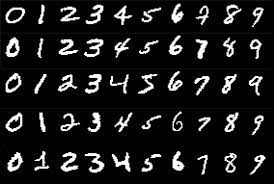

###推論処理
MNISTデータセットの画像サイズは28×28であり、0～9の10クラス分類を行うことから、今回は入力層が７８４個、出力層が１０個のニューロンでそれぞれ構成されるネットワークを実装する。また、隠れ層は2層で、それぞれ1つ目は50個、2つ目は100個のニューロンを持つものとする。（この2つの値は任意の値に変更可能）

##バッチ処理
ライブラリの多くは、大きな配列の計算を効率よく処理できるよう最適化されているため、行列を用いて複数の処理をまとめて行うと、処理時間を大きく短縮することができる。

#本章で学んだこと
- ニューラルネットワークでは、活性化関数としてシグモイド関数やReLU関数のような滑らかに変化する関数を利用する。
- NumPyの多次元配列をうまく使うことで、ニューラルネットワークを効率よく実装することができる。
- 機械学習の問題は、回帰問題と分類問題に大別できる。
- 出力層で使用する活性化関数は、回帰問題では恒等関数、分類問題ではソフトマックス関数を一般的に使用する。
- 分類問題では、出力層のニューロンの数を分類するクラス数に設定する。
- 入力データのまとまりをバッチといい、バッチ単位で推論処理を行うことで、計算を高速に行うことができる。